# GLBL 5010 - Homework Assignment 1: Examining Convergence

This notebook:
- loads the dataset provided on Canvas
- constructs annualized GDP per capita growth from 1960-2000
- produces required summary stats and plots

**IMPORTANT**  
This notebook assumes csv file is in the same folder as this ipynb  

In [3]:
# Imports and formatting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 100)
pd.set_option("display.float_format", "{:.2f}".format)

%matplotlib inline

In [5]:
# Load the csv

df = pd.read_csv("hwk1_convergence.csv", sep="\t") # separator argument added since dilineated by tabs by stata export
df.head()

,code,gdppc1960,gdppc2000,abslatitude,edu1960,region
0,AFG,NaN,NaN,0.37,16.88,Asia
1,AGO,NaN,2228.59,0.14,9.79,Sub-Saharan Africa
2,ALB,NaN,5315.43,NaN,90.20,Europe & Central Asia
3,ARE,NaN,111000.00,0.27,43.78,Middle East & North Africa
4,ARG,3211.93,14332.46,0.38,56.46,Americas


In [8]:
# inspect dataframe and make columns easier to read
df.info()
df.columns

COUNTRY = "code"
REGION = "region"
GDP1960 = "gdppc1960"
GDP2000 = "gdppc2000"
EDU1960 = "edu1960"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   code         174 non-null    object 
 1   gdppc1960    109 non-null    float64
 2   gdppc2000    160 non-null    float64
 3   abslatitude  155 non-null    float64
 4   edu1960      120 non-null    float64
 5   region       174 non-null    object 
dtypes: float64(4), object(2)
memory usage: 8.3+ KB


In [9]:
# data cleaning of the dataframe we got from the csv file

# converting to numeric columns, invlaid entries set to NaN so they are excluded from analysis
for c in [GDP1960, GDP2000, EDU1960]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Keep only relevant columns
d = df[[COUNTRY, REGION, GDP1960, GDP2000, EDU1960]].copy()

# Drop missing values
d = d.dropna()

# Logs require strictly positive values
d = d[(d[GDP1960] > 0) & (d[GDP2000] > 0)]

# Log GDP per capita in 1960
d["ln_gdppc_1960"] = np.log(d[GDP1960])

# Annualized GDPPC growth rate, 1960–2000
T = 40
d["g_ann"] = (d[GDP2000] / d[GDP1960])**(1/T) - 1

d.head()

,code,region,gdppc1960,gdppc2000,edu1960,ln_gdppc_1960,g_ann
4,ARG,Americas,3211.93,14332.46,56.46,8.07,0.04
9,BDI,Sub-Saharan Africa,754.99,747.83,2.60,6.63,-0.00
10,BEL,Europe & Central Asia,10628.08,33739.32,88.91,9.27,0.03
11,BEN,Sub-Saharan Africa,1780.01,1695.30,12.42,7.48,-0.00
12,BFA,Sub-Saharan Africa,977.47,1452.54,2.48,6.88,0.01


# Q1: Histogram of annualized GDP per capita growth rates (1960–2000)

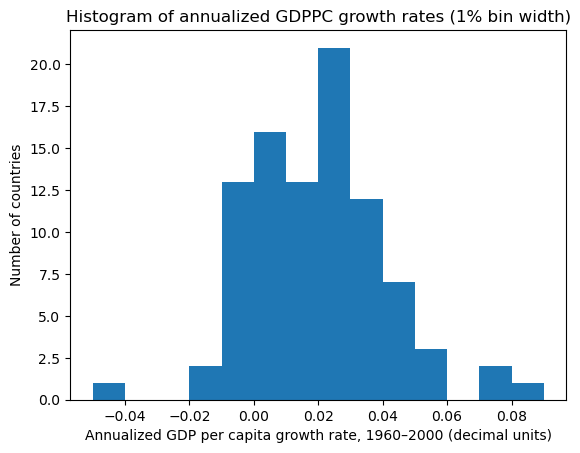

In [10]:

# We use the annualized growth rate variable "g_ann", which is in DECIMAL units:
#   ex: 0.02 = 2% annual growth.
#
# The assignment asks for bin widths of 1 percentage point (1%).
# Since 1% = 0.01 in decimal units, we set bin_width = 0.01.

bin_width = 0.01

# Determine min/max growth rates to build a bin sequence that covers the full range
gmin, gmax = d["g_ann"].min(), d["g_ann"].max()

# Create evenly spaced histogram bins with width = 0.01 (1 percentage point)
# We use floor/ceil so the first/last bin boundaries are round values.
bins = np.arange(
    np.floor(gmin / bin_width) * bin_width,
    np.ceil(gmax / bin_width) * bin_width + bin_width,
    bin_width
)

# Plot histogram
plt.figure()
plt.hist(d["g_ann"], bins=bins)

# Label axes clearly for the visualization
plt.xlabel("Annualized GDP per capita growth rate, 1960–2000 (decimal units)")
plt.ylabel("Number of countries")
plt.title("Histogram of annualized GDPPC growth rates (1% bin width)")

plt.show()